# **Shipping Box Size Recognition Using Real-Time Deep Learning Inference Technique**

**Pre-Requiste:**

Hardware:

*   Nvidia Jetson Nano 2GB
*   MicroSD Card - 32GB/64GB
*   Logitech USB Camera
*   USB Network Adaptor
*   HDMI Display
*   Keyboard
*   Mouse
*   Power Supply (5V⎓3A)

Software:

*   Developer Kit SD Card Image (JetPack 4.7.1)
*   Docker Container: L4T R32.7.1
*   Library: https://github.com/dusty-nv/jetson-inference/
*   Terminal

Operating System:

*   macOS Big Sur






**Setting up the Jetson Nano 2GB: **
I Powered Up the Jetson Nano 2GB and Connect it with the Display using the HDMI Cable

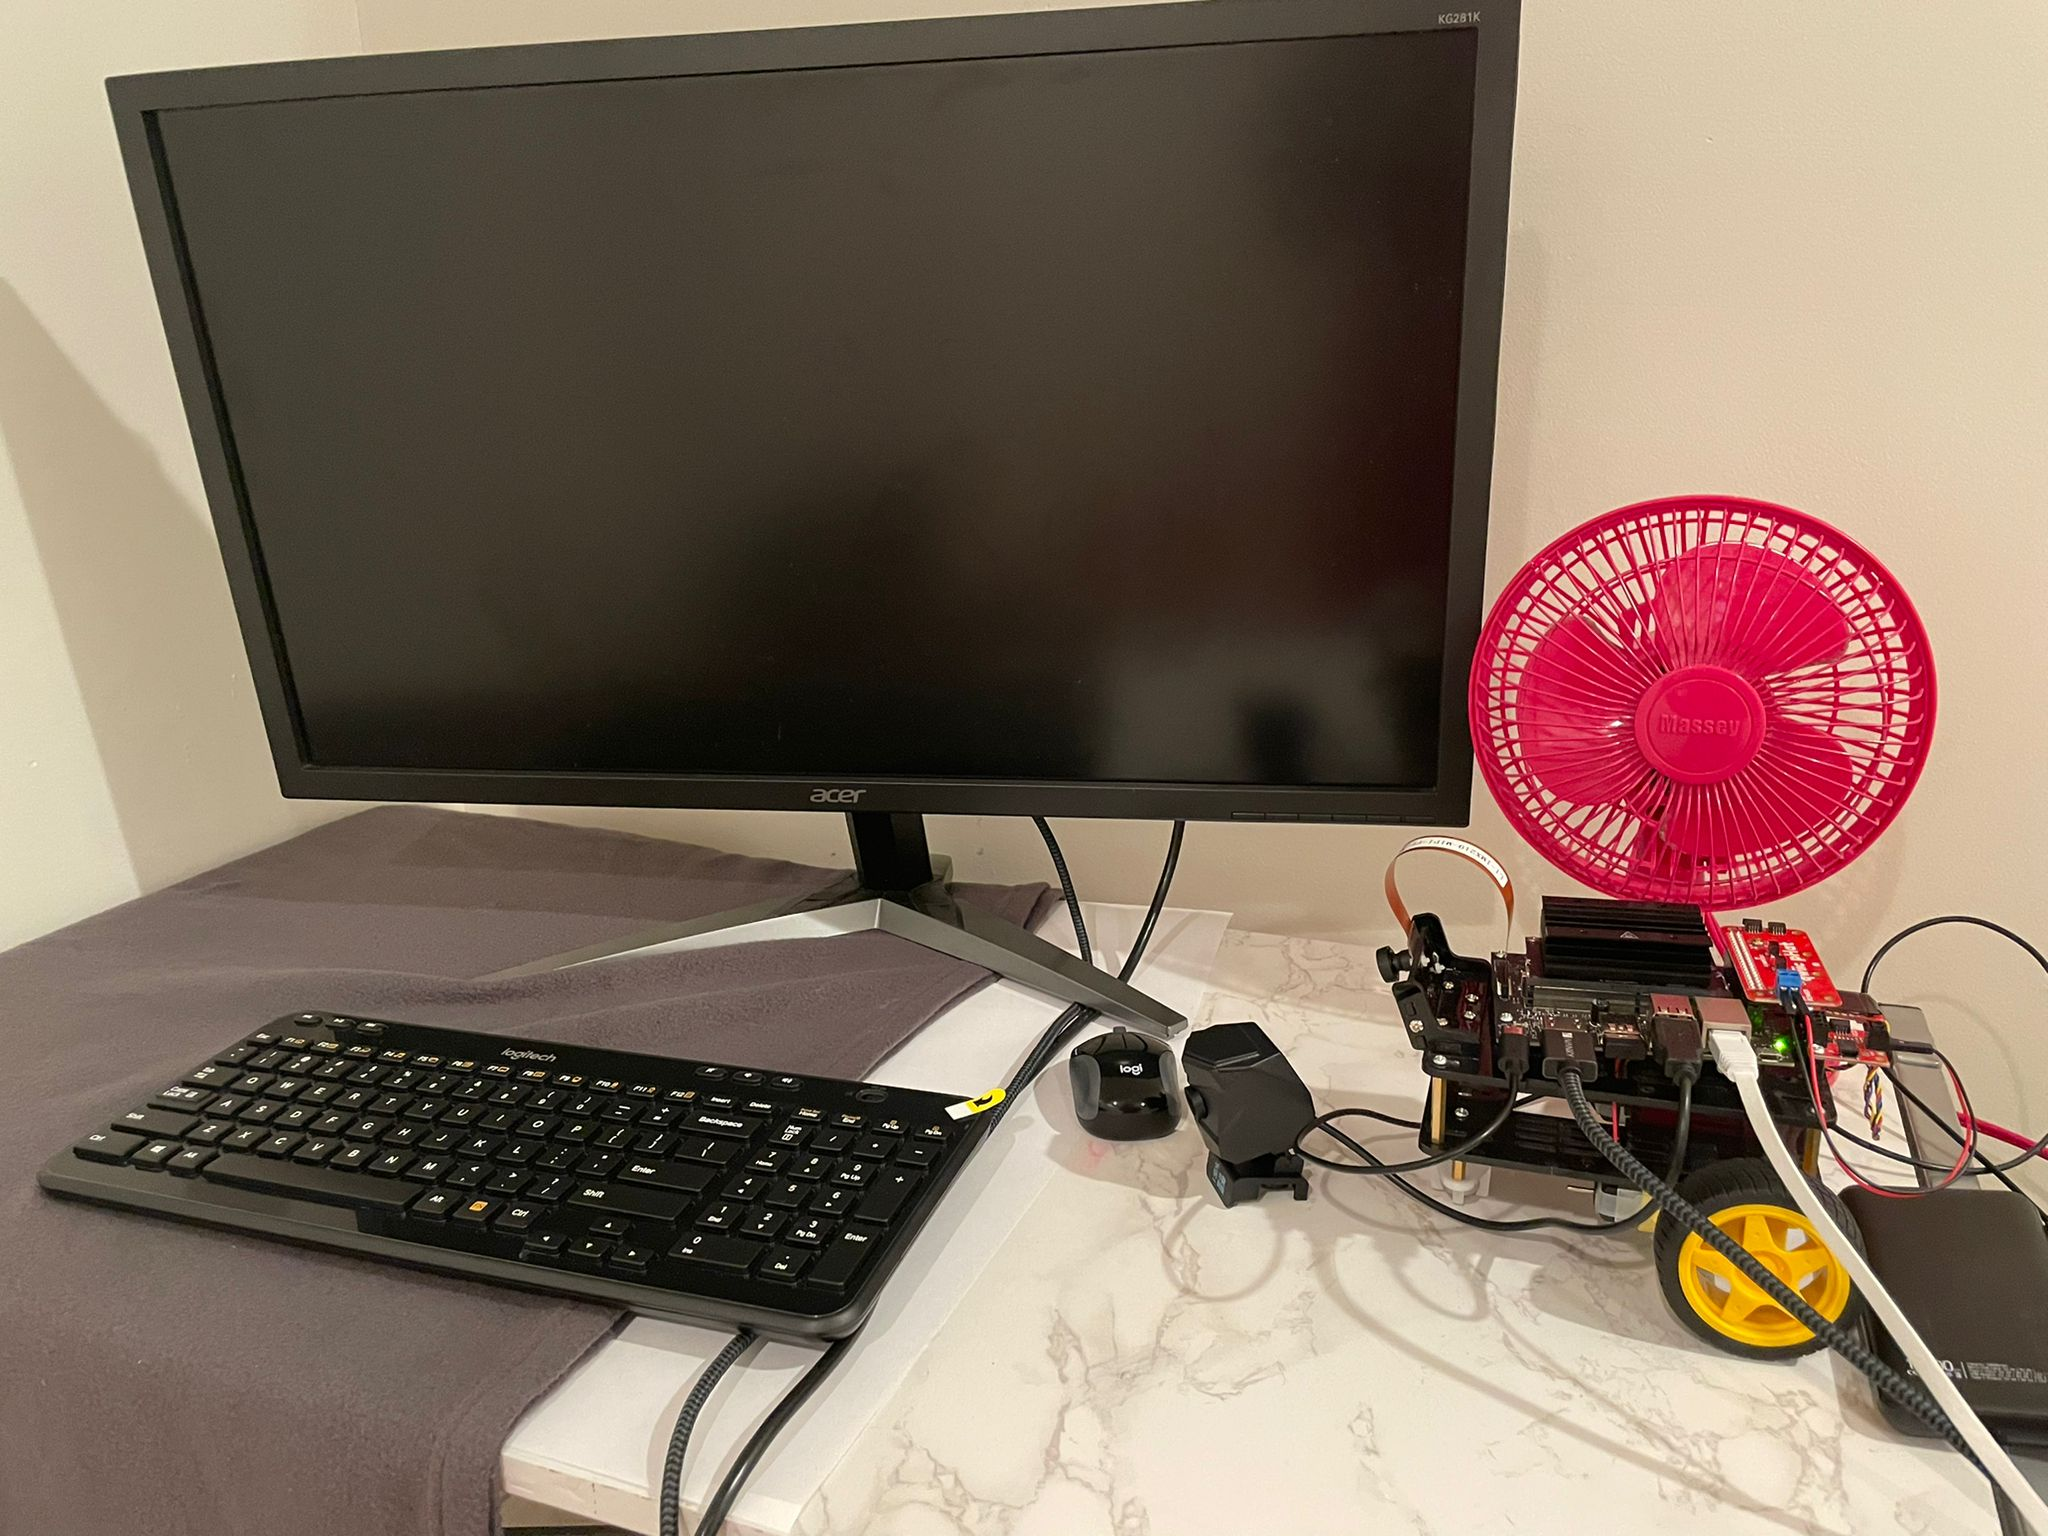

**Setting up & Running the Docker Container**

In [ ]:
%mkdir jetson-inference #Make this directory in the jetson's home directory folder
%git clone --recursive https://github.com/dusty-nv/jetson-inference #Download the Library
%cd jetson-inference #Change path to jetson-inference directory
%docker/run.sh #Ran the Docker

**Preparing the Dataset for Training, Testing & Validation**



*   Go to the folder home/nvidia/jetson-inference/python/training/detection/ssd/data & create a folder 'ship'
*   Inside 'ship' folder create a labels.txt file and enter the categories 'small' & 'medium'



In [ ]:
%camera-capture --input-width=1280 --input-height=720 /dev/video0 #Open the Widget to start training the model

Widget Settings:
Dataset Type: Detection
Dataset Path: home/nvidia/jetson-inference/python/training/detection/ssd/data/ship
Class Labels: home/nvidia/jetson-inference/python/training/detection/ssd/data/ship/labels.txt
Other settings:


*   Save on Unfreeze (Check)
*   Clear on Unfreeze (Uncheck)
*   Merge Datasets (Check)

Steps:

1.   Click on freeze button and create a boundary around the item
2.   Click on unfreeze
3.   Click on Save
4.   Create boundary boxes for each item in different angles, select the category and save. Repeat this for all the items


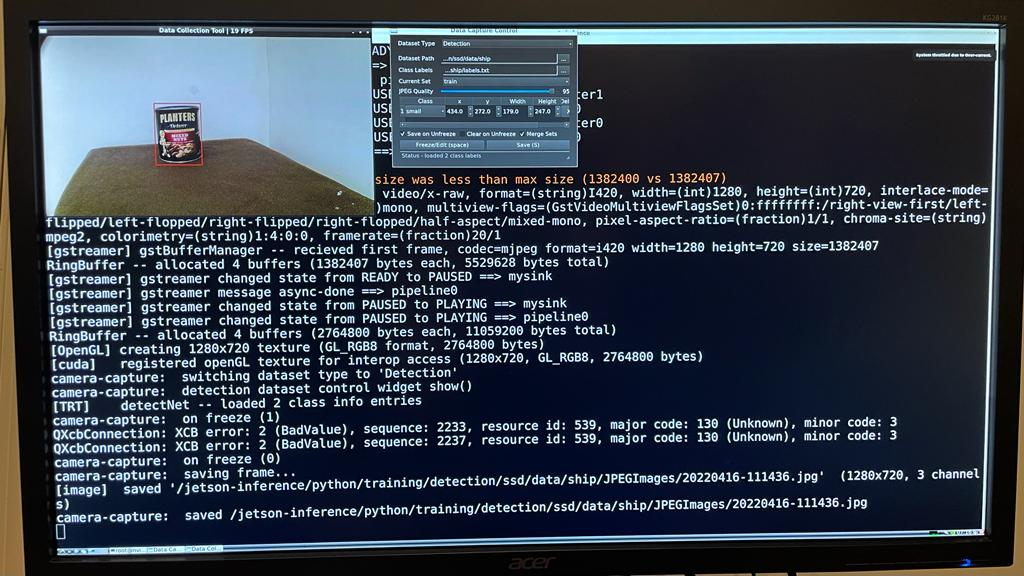

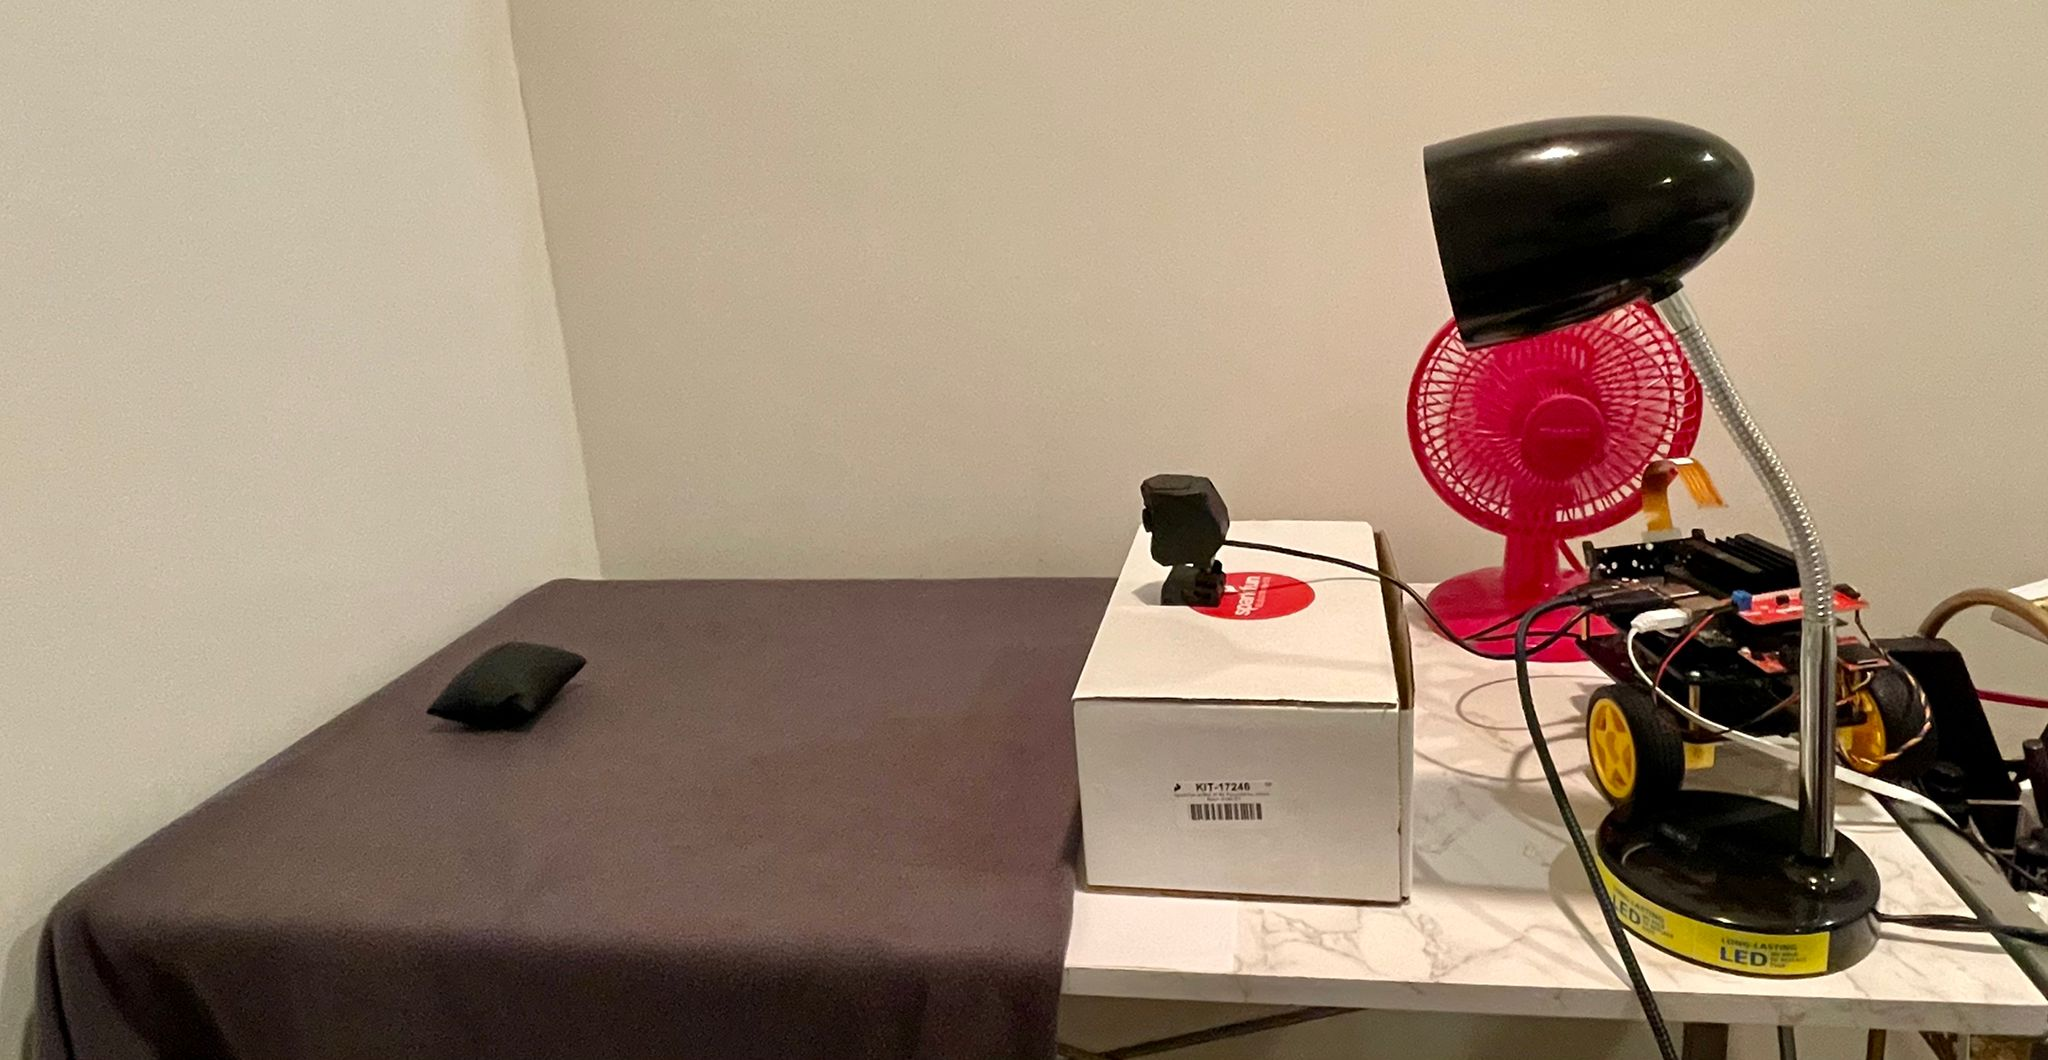

**Mounting Swap for Extra Space:**

In [ ]:
%sudo sytemctl disable nvzramconfig
%sudo fallocate -l 4G /mnt/4GB.swap
%sudo mkswap /mnt/4GB.swap
%sudo swapon /mnt/4GB.swap

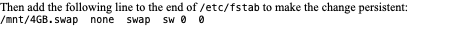

The swap file will be automatically mounted after **reboot**

In [ ]:
exit #exit the container
%reboot #reboot the system
#Open the terminal
%cd jetson-inference
%docker/run.sh
%cd python/training/detection/ssd #Change the directory to this path

**Train the SSD-Model**


**DetectNet Caffe Model - SSD MobileNet V2**

This is a one-stage object detection model. It is a model commonly deployed on low compute edge devices with decent accuract performance.


In the previous version MobileNetV1, Depthwise Separable Convolution is introduced which dramatically reduce the complexity cost and model size of the network, which is suitable to Mobile devices, or any devices with low computational power. In MobileNetV2, a better module is introduced with inverted residual structure. Non-linearities in narrow layers are removed this time. With MobileNetV2 as backbone for feature extraction, state-of-the-art performances are also achieved for object detection and semantic segmentation.



During implementation, it takes an image as input and returns bounding boxes for the objects in the image. The model is pre-trained on COCO 2017 which comprises images with multiple objects and the task is to identify the objects and their positions in the image.

**References:**
* https://vidishmehta204.medium.com/object-detection-using-ssd-mobilenet-v2-7ff3543d738d

* https://aws.amazon.com/marketplace/pp/prodview-lc2ud4oz3xjja

* https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c


In [ ]:
#Launch the Training
%python3 train_ssd.py --data=data/ship --model-dir=models/ship --batch-size=4 --epochs=30

In [ ]:
#convert the trained model from PyTorch to ONNX, so that we can load it with TensorRT
%python3 onnx_export.py --model-dir=models/ship

**Training Outcome** Loss - 2.08474 , lowest at epoch # 28

Reference: https://github.com/dusty-nv/jetson-inference/blob/master/docs/pytorch-ssd.md

In [ ]:
%exit #Exit the docket
%cd ~/
%mkdir ai-project
%cd ai-project
%touch ai-project.py

In the respective folder, write the following script:

In [ ]:
import jetson.inference
import jetson.utils

net = jetson.inference.detectNet(argv=['--model=../jetson-inference/python/training/detection/ssd/models/ship/ssd-mobilenet.onnx', '--labels=../jetson-inference/python/training/detection/ssd/models/ship/labels.txt', '--input-blob=input_0', '--output-cvg=scores', '--output-bbox=boxes'])
camera = jetson.utils.videoSource("/dev/video0")
display = jetson.utils.videoOutput()
info = jetson.utils.cudaFont()

w1 = 100
w2 = 200
w3 = 300
w4 = 400
w5 = 500
w6 = 600
w7 = 700

h1 = 100
h2 = 200
h3 = 300
h4 = 400
h5 = 500
h6 = 600
h7 = 700

def box_suggest(w,h):
	if w < w1:
			if h < h1:
				return "Box 1-1"
			elif h < h2:
				return "Box 1-2"
			elif h < h3:
				return "Box 1-3"
			elif h < h4:
				return "Box 1-4"
			elif h < h5:
				return "Box 1-5"
      elif h < h6:
        return "Box 1-6"
      elif h < h7:
        return "Box 1-7"
			else:
				return "Box 1-Unknown"

	elif w < w2:
			if h < h1:
				return "Box 2-1"
			elif h < h2:
				return "Box 2-2"
			elif h < h3:
				return "Box 2-3"
			elif h < h4:
				return "Box 2-4"
			elif h < h5:
				return "Box 2-5"
      elif h < h6:
        return "Box 2-6"
      elif h < h7:
        return "Box 2-7"
			else:
				return "Box 2-Unknown"


	elif w < w3:
			if h < h1:
				return "Box 3-1"
			elif h < h2:
				return "Box 3-2"
			elif h < h3:
				return "Box 3-3"
			elif h < h4:
				return "Box 3-4"
			elif h < h5:
				return "Box 3-5"
      elif h < h6:
        return "Box 3-6"
      elif h < h7:
        return "Box 3-7"
			else:
				return "Box 3-Unknown"

	elif w < w4:
			if h < h1:
				return "Box 4-1"
			elif h < h2:
				return "Box 4-2"
			elif h < h3:
				return "Box 4-3"
			elif h < h4:
				return "Box 4-4"
			elif h < h5:
				return "Box 4-5"
      elif h < h6:
        return "Box 4-6"
      elif h < h7:
        return "Box 4-7"
			else:
				return "Box 4-Unknown"

	elif w < w5:
			if h < h1:
				return "Box 5-1"
			elif h < h2:
				return "Box 5-2"
			elif h < h3:
				return "Box 5-3"
			elif h < h4:
				return "Box 5-4"
			elif h < h5:
				return "Box 5-5"
      elif h < h6:
        return "Box 5-6"
      elif h < h7:
        return "Box 5-7"
			else:
				return "Box 5-Unknown"

	elif w < w6:
			if h < h1:
				return "Box 6-1"
			elif h < h2:
				return "Box 6-2"
			elif h < h3:
				return "Box 6-3"
			elif h < h4:
				return "Box 6-4"
			elif h < h5:
				return "Box 6-5"
      elif h < h6:
        return "Box 6-6"
      elif h < h7:
        return "Box 6-7"
			else:
				return "Box 6-Unknown"

	elif w < w7:
			if h < h1:
				return "Box 7-1"
			elif h < h2:
				return "Box 7-2"
			elif h < h3:
				return "Box 7-3"
			elif h < h4:
				return "Box 7-4"
			elif h < h5:
				return "Box 7-5"
      elif h < h6:
        return "Box 7-6"
      elif h < h7:
        return "Box 7-7"
			else:
				return "Box 5-Unknown"
	else:
			return "Box Unknown"

while True:
	img = camera.Capture()
	detections = net.Detect(img,overlay='box')
	for detection in detections:
		info.OverlayText(img,img.width,img.height,"Length & Width:{:.2f} X {:.2f}, Suggested Box: {}".format(detection.Height,detection.Width,box_suggest(detection.Width,detection.Height)),5,5,(0,0,0),(255,255,255))
	display.Render(img)
	display.SetStatus("Object Detection | Network {:.0f} FPS".format(net.GetNetworkFPS()))

Reference: https://github.com/dusty-nv/jetson-inference/blob/master/docs/detectnet-example-2.md

In [ ]:
%cd ~/jetson-inference
%docker/run.sh --volume ~/ai-project:/ai-project
%cd /ai-project
%python3 ai-project

In [ ]:
from google.colab import drive
# Mounted the drive from where the source excel file will be loaded and destination file will be created
drive.mount('/content/drive')
%cd /content/drive/  Shareddrives/Machine Learning/
%cd peakactivity/

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('demo_video.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Reference: https://github.com/dusty-nv/jetson-inference

**Challenges:**

As you can see from the visuals, the results lack accuracy, some of the reasons are:

*	Training Dataset is too small i.e. 73 images and merged train, test, and validation dataset
*	Low Memory Issue since I am using Jetson Nano 2GB

**Way Forward:**
*	Use a dataset with large amount of images, at least 1000
*	Use Jetson XAVIAR
*	Use higher batch-size, workers, and epochs
*	Use non-reflective surfaces